In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
url ="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df=pd.read_csv(url)

In [11]:
abs_freq=df['class'].value_counts()
rel_freq=df['class'].value_counts(normalize=True)*100
cum_freq=abs_freq.cumsum()

freq_table=pd.DataFrame({
    'Absolute Frequency':abs_freq,
    'Relative Frequecy':rel_freq,
    'Cumulative Frequency':cum_freq
})

print(freq_table)

        Absolute Frequency  Relative Frequecy  Cumulative Frequency
class                                                              
Third                  491          55.106622                   491
First                  216          24.242424                   707
Second                 184          20.650954                   891


--Skewness in class distribution:

The distribution is heavily skewed towards Third class, meaning most people were traveling in the lower class.

In [12]:
contingency_table=pd.crosstab(df['sex'],df['survived'],margins=True)
contingency_table.rename(index={'All':'Total'},columns={'All':'Total'},inplace = True)
print(contingency_table)

survived    0    1  Total
sex                      
female     81  233    314
male      468  109    577
Total     549  342    891


1.Non-survival by sex:
--Most males did not survive (468 out of 577, ~81.1%).
--Fewer females did not survive (81 out of 314, ~25.8%).

Overall survival:
--Females significantly exceeded the overall survival rate, while males were well below it.

Implication:
--Sex had a strong impact on survival, with females much more likely to survive than males.

In [13]:
total=len(df)
joint_prob=len(df[(df['sex']=='female') & (df['survived']==1)])/total
print(joint_prob)

marg_female=len(df[df['sex']=='female'])/total
print(marg_female)

marg_survived=len(df[df['survived']==1])/total
print(marg_survived)

cond_surv_fem=joint_prob/marg_female
print(cond_surv_fem)

cond_fem_surv=joint_prob/marg_survived
print(cond_fem_surv)

0.2615039281705948
0.35241301907968575
0.3838383838383838
0.7420382165605095
0.6812865497076023


--Being female greatly increased the chance of survival (~74%).

--Among survivors, females are the majority (~68%).

--The joint probability (~26%) shows the proportion of the whole dataset who are female and survived.

           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000


<Axes: >

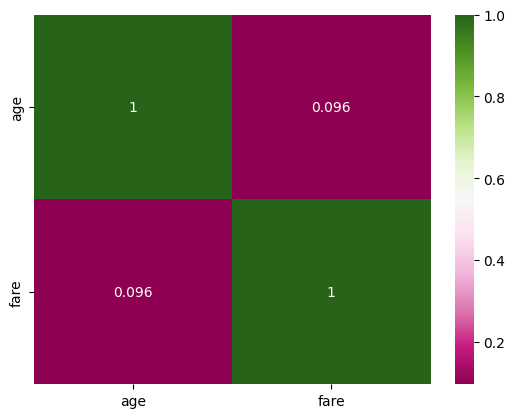

In [14]:
df_clean=df[['age','fare']].dropna()
correlation=df_clean.corr(method='pearson')
print(correlation)

sns.heatmap(correlation, annot=True, cmap='PiYG')

1.Age and fare are almost independent in this dataset.
--The correlation is only ~0.096, which is very close to zero.
--This means knowing the passenger's age gives almost no information about the fare they paid.

2.Fare is more related to other factors, like class (1st, 2nd, 3rd), rather than age.

3.This aligns with typical Titanic data observations: younger or older passengers could pay low or high fares depending on ticket class, not their age.

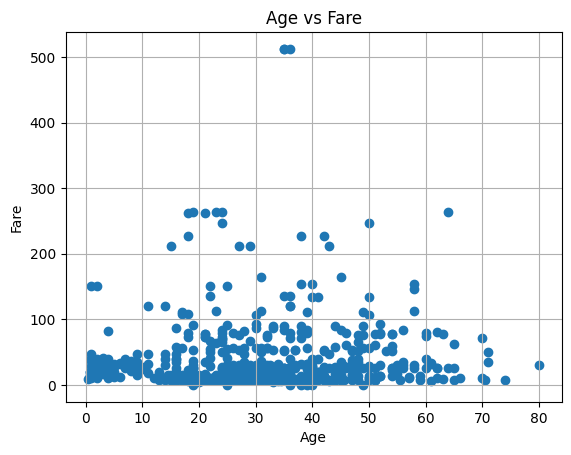

In [15]:
plt.scatter(df_clean['age'],df_clean['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.grid()
plt.show()

1.No Obvious Correlation: There is no clear relationship between a passenger's age and the fare they paid. The points are widely scattered, indicating that age is not a good predictor of fare.

2.Fare is Skewed Low: The vast majority of passengers paid a relatively low fare, with most data points clustered below $100. This suggests that cheaper tickets were much more common.

3.Presence of Outliers: There are several high-fare outliers. A few passengers paid significantly more than the average, with one ticket costing over $500. These high fares were paid by people across a range of ages, further weakening any potential age-fare correlation.

4.Wide Age Distribution: The passengers represent a broad age range, from infants (age near 0) to seniors (age 80). The most common age group appears to be between 20 and 40 years old.

5.Implied Factor: The lack of correlation strongly suggests that another, unplotted variable—most likely passenger class (First, Second, Third)—was the primary factor determining the ticket price

survived    0    1
class             
First      80  136
Second     97   87
Third     372  119 




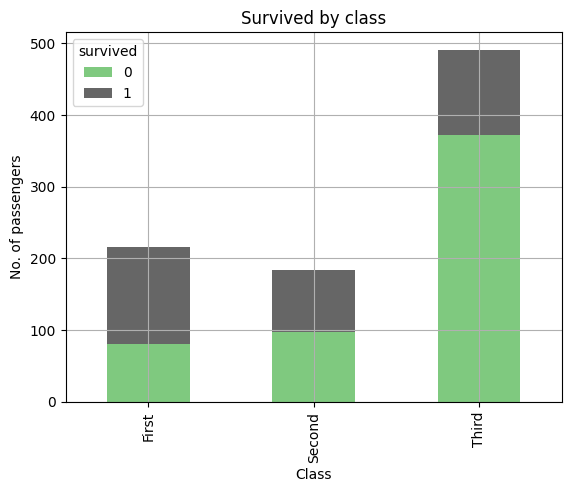

In [16]:
surv_class=pd.crosstab(df['class'],df['survived'])
print(surv_class,'\n\n')
surv_class.plot(kind='bar',stacked=True,colormap='Accent')

plt.title('Survived by class')
plt.xlabel('Class')
plt.ylabel('No. of passengers')
plt.legend(title='survived')
plt.grid()
plt.show()

1.Survival Rate Decreases with Class: The most significant conclusion is that your chances of survival were directly tied to your ticket class.

--First Class passengers had the highest survival rate. More people survived (136) than perished (80), resulting in a survival rate of approximately 63%.

--Second Class passengers had a roughly even chance of survival, with slightly more passengers perishing (97) than surviving (87). The survival rate was about 47%.

--Third Class passengers had the lowest survival rate by a large margin. A staggering 372 passengers died, while only 119 survived, leading to a survival rate of only 24%.